# TASK I-
    Use linear regression and SVM (with Linear kernel) and Random Forest(with a maximum depth of your choice) algorithms 
    to classify the hand-written numbers in 10 output classes (0-9) (5 pts-Mandatory)

In [52]:
#importing libraries

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import DataLoader

#from sklearn import datasets 
# # Import train_test_split function
from sklearn.model_selection import train_test_split  
#Import scikit-learn dataset library
from sklearn import svm #Import svm model
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

import matplotlib.pyplot as plt

import numpy as np



### Linear Regression


In [46]:
#Section I-importing data load the dataset, split into input (X) and output (y) variables. 
# loading training data
train_dataset = datasets.MNIST(root='./data', 
                               train=True, 
                               transform=transforms.ToTensor(),
                               download=True)
# loading test data, IGNORING UNTIL LATER
test_dataset = datasets.MNIST(root='./data', 
                              train=False, 
                              transform=transforms.ToTensor())
###X = dataset[1:,0:8] #getting the 8 first columns as input.The reason for "1"instead of "0" is todiscard the headings
###y = dataset[1:,8] #getting the last column as output. The reason for "1"instead of "0" is todiscard the headings
X = [train_dataset[i][0].flatten().tolist() for i in range(len(train_dataset))]  # Convert images to lists of 784 features
y = [train_dataset[i][1] for i in range(len(train_dataset))]  # Get the labels
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)  
#Splitting into train and validation datasets with 67% trainset and 33% validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [47]:
#Section II-defining the model:  linear regression model with 2 layers, input and output
model = nn.Sequential(
  nn.Linear(784, 10) # 784 input features (28x28 pixels flattened) → 10 output classes (digits 0-9)
  #,nn.Sigmoid()
)
#printing model layers and specifications
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=10, bias=True)
)


In [48]:
#Secion III-training the model
n_epochs = 10
batch_size = 32
history = []
# define loss function
loss_fn = nn.MSELoss()
# define optimizer with a spicific learning rate
optimizer = optim.Adam(model.parameters(), lr=0.001)
for epoch in range(n_epochs):
  for i in range(0, len(X_train), batch_size):
        # take a batch
        Xbatch = X_train[i:i+batch_size]
        ybatch = y_train[i:i+batch_size]
        # forward pass
        y_pred =model(Xbatch) #  torch.max(model(Xbatch), 1)
        loss = loss_fn(y_pred, ybatch)
        # backward pass
        optimizer.zero_grad()
        loss.backward()
        # update weights
        optimizer.step()

  model.eval()
  y_pred = model(X_test)
  mse = loss_fn(y_pred, y_test)
  #mse_train = loss_fn(y_, y_test)
  mse = float(mse)
  history.append(mse)
  print(f'Finished epoch {epoch}, latest MSE {mse}')

c:\Users\ellin\OneDrive\Documents\MSc_IoT_MAU\DA642E-AI-and-Data-Management-for-IOT\.venv\Lib\site-packages\torch\nn\modules\loss.py:610: UserWarning: Using a target size (torch.Size([32, 1])) that is different to the input size (torch.Size([32, 10])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\ellin\OneDrive\Documents\MSc_IoT_MAU\DA642E-AI-and-Data-Management-for-IOT\.venv\Lib\site-packages\torch\nn\modules\loss.py:610: UserWarning: Using a target size (torch.Size([8, 1])) that is different to the input size (torch.Size([8, 10])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\ellin\OneDrive\Documents\MSc_IoT_MAU\DA642E-AI-and-Data-Management-for-IOT\.venv\Lib\site-packages\torch\nn\modules\loss.py:610: UserWarning: Using a target si

Finished epoch 0, latest MSE 3.8196356296539307
Finished epoch 1, latest MSE 3.5607283115386963
Finished epoch 2, latest MSE 3.444693088531494
Finished epoch 3, latest MSE 3.373958110809326
Finished epoch 4, latest MSE 3.327547073364258
Finished epoch 5, latest MSE 3.296523094177246
Finished epoch 6, latest MSE 3.2757349014282227
Finished epoch 7, latest MSE 3.2618649005889893
Finished epoch 8, latest MSE 3.2526865005493164
Finished epoch 9, latest MSE 3.2466883659362793


In [49]:
#Section IV-evaluating the model
# compute accuracy (no_grad is optional)
with torch.no_grad():
    y_pred = model(X)
accuracy = (y_pred.round() == y).float().mean()
print(f"Accuracy {accuracy}")

Accuracy 0.2257699966430664


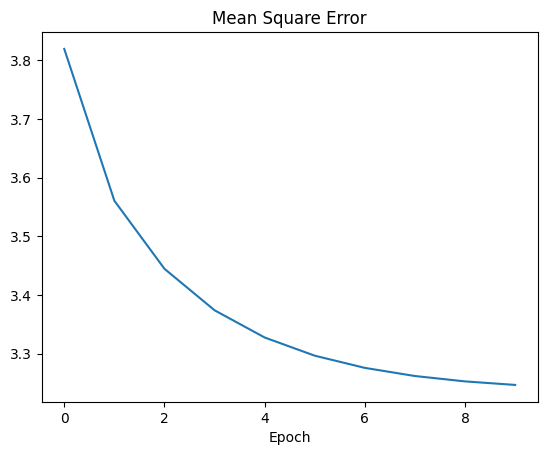

In [50]:
#Section V-visualizing the outputs
plt.plot(history)
plt.title('Mean Square Error')
plt.xlabel("Epoch")
plt.ylabel("")
plt.show()

### SVM

In [44]:
#Load dataset 
train_dataset = datasets.MNIST(root='./data', 
                               train=True, 
                               transform=transforms.ToTensor(),
                               download=True)

X = [train_dataset[i][0].flatten().tolist() for i in range(len(train_dataset))]  # Convert images to lists of 784 features
y = [train_dataset[i][1] for i in range(len(train_dataset))]  # Get the labels
"""X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)  """

# Split dataset into training set and test set - 70% training and 30% test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=109) 

#Create a svm Classifier with Linear Kernel
clf = svm.SVC(kernel='linear') 
#Train the model using the training sets
clf.fit(X_train, y_train) 
#Predict the response for test dataset 
y_pred = clf.predict(X_test)

# Model Accuracy: how often is the classifier correct
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision and Recall: what percentage of positive tuples are labeled as such? 
print("Precision:",metrics.precision_score(y_test, y_pred, average='weighted')) 
print("Recall:",metrics.recall_score(y_test, y_pred, average='weighted'))

Accuracy: 0.9340555555555555
Precision: 0.9340390436911781
Recall: 0.9340555555555555


### Random Forest

In [ ]:
#Load dataset 
train_dataset = datasets.MNIST(root='./data', 
                               train=True, 
                               transform=transforms.ToTensor(),
                               download=True)

X, y = make_classification(n_samples=1000, n_features=4,

                           n_informative=2, n_redundant=0,

                           random_state=0, shuffle=False)

clf = RandomForestClassifier(max_depth=2, random_state=0)

clf.fit(X, y)
RandomForestClassifier(...)

print(clf.predict([[0, 0, 0, 0]]))
[1]